# Imports

In [5]:
import yfinance as yf # using yahoo finance api
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Data Collection

In [2]:
# Define stock ticker symbol
ticker = "NVDA"

# Fetch historical stock data from Yahoo Finance
nvda = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Display first few rows
nvda.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2019-01-02,3.377779,3.433819,3.224785,3.239415,508752000
2019-01-03,3.173705,3.351496,3.166266,3.317525,705552000
2019-01-04,3.377035,3.415222,3.216106,3.246853,585620000
2019-01-07,3.555819,3.592766,3.382987,3.434316,709160000
2019-01-08,3.467295,3.639631,3.394641,3.637399,786016000


# Quick Look

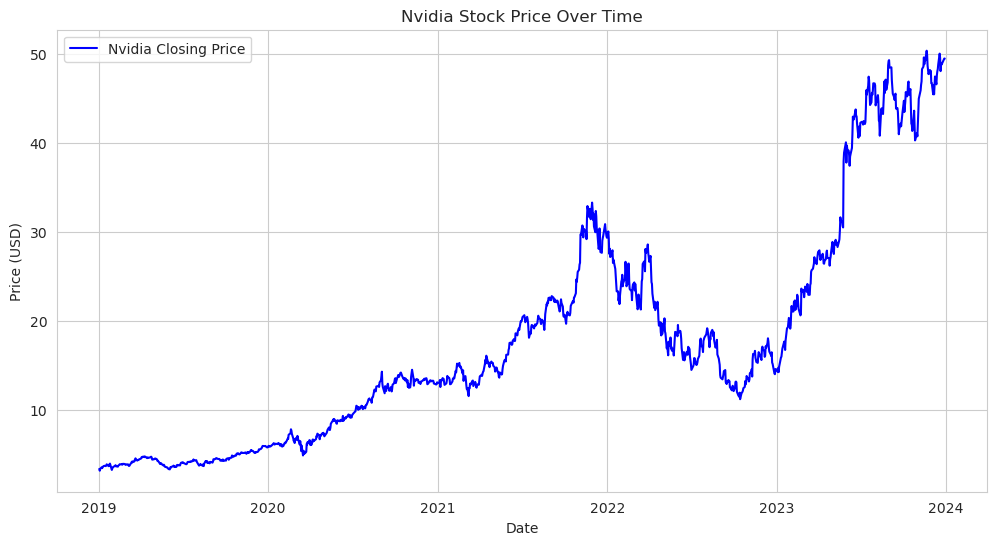

In [3]:
plt.figure(figsize=(12,6))
plt.plot(nvda["Close"], label="Nvidia Closing Price", color='blue')
plt.title("Nvidia Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Thoughts

This is really cool, knowing what's been happening the last 5 years, you see the constant rise during covid, where everyone was getting a gaming computer or buying gpus for their existing computer. I'm shocked to see that drop late 2022, but I do remember something about the US government asking Nvidia to not sell to China and also the issue with not getting computer chips, and that might be why. then you see the rise again when you came, OpenAI's "first" chatgpt and every company was rushing to either finish or produce something similar so the demand for gpus rose again. So in summary:

* **2020-2021 Boom** &rarr; COVID lockdowns &rarr; Higher gaming & AI demand &rarr; GPU shortages &rarr; Stock surged.

* **Late 2022 Drop** &rarr; US Government restrictions on AI chips to China + global semiconductor shortage.

* **2023-Present Rebound** &rarr; OpenAI’s ChatGPT launch &rarr; Massive AI adoption &rarr; Nvidia dominates AI GPU market.

For financial data, it's crucial to understand global events and resource management, as these factors directly impact supply and demand. Changes in supply and demand, in turn, influence stock prices for publicly traded companies. Even for non-public entities, such economic shifts affect investors, funding opportunities, and overall market sentiment.

# Digging Deeper

In [36]:
# nvda.drop("MA30", axis=1, inplace=True)
# nvda.drop("MA90", axis=1, inplace=True)
# nvda.drop("MA180", axis=1, inplace=True)

nvda

Price,Close,High,Low,Open,Volume,MA30,MA90,MA180
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,
Date,,,,,,,,
2019-01-02,3.377779,3.433819,3.224785,3.239415,508752000,NaN,NaN,NaN
2019-01-03,3.173705,3.351496,3.166266,3.317525,705552000,NaN,NaN,NaN
2019-01-04,3.377035,3.415222,3.216106,3.246853,585620000,NaN,NaN,NaN
2019-01-07,3.555819,3.592766,3.382987,3.434316,709160000,NaN,NaN,NaN
2019-01-08,3.467295,3.639631,3.394641,3.637399,786016000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,48.811672,49.364462,48.448806,49.176533,252507000,48.171807,45.780034,41.609015
2023-12-26,49.260498,49.581377,48.941618,48.949614,244200000,48.203403,45.846035,41.729567


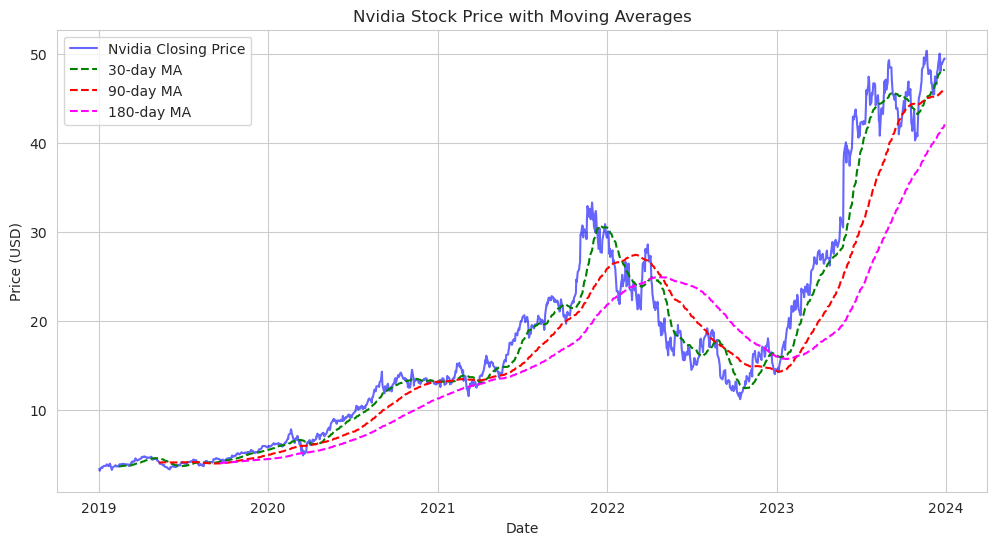

In [35]:
# Create moving averages

# Create the moving averages for some window sizes, "short-term" or "long-term"
nvda["MA30"] = nvda["Close"].rolling(window=30).mean() # monthly moving average
nvda["MA90"] = nvda["Close"].rolling(window=90).mean() # every 3 months
nvda["MA180"] = nvda["Close"].rolling(window=180).mean() # every 6 months

# Plot with moving averages
plt.figure(figsize=(12,6))
plt.plot(nvda["Close"], label="Nvidia Closing Price", color='blue', alpha=0.6)
plt.plot(nvda["MA30"], label="30-day MA", color='green', linestyle="--")
plt.plot(nvda["MA90"], label="90-day MA", color='red', linestyle="--")
plt.plot(nvda["MA180"], label="180-day MA", color='magenta', linestyle="--")


plt.title("Nvidia Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()